In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('machine failure.csv')

In [83]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [84]:
from sklearn.preprocessing import StandardScaler
import numpy as np

ss = StandardScaler()
df[['Rotational speed [rpm]','Torque [Nm]']] = ss.fit_transform(df[['Rotational speed [rpm]','Torque [Nm]']])

In [85]:
df

,UDI,faktor,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,0.068587,0.281673,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,L47182,L,0.1,0.5,-0.227095,0.943784,5.0,0.0,0.0,0.0,0.0,0.0,0
3,4,L47183,L,0.2,0.6,-0.589725,-0.049382,7.0,0.0,0.0,0.0,0.0,0.0,0
9,10,M14869,M,298.5,309.0,1.128581,-1.203061,21.0,0.0,0.0,0.0,0.0,0.0,0
15,16,L47195,L,298.6,309.2,0.018377,0.843464,42.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,9996,M24855,M,298.8,308.4,0.364270,-1.052581,14.0,0.0,0.0,0.0,0.0,0.0,0
10004,9997,H39410,H,298.9,308.4,0.520479,-0.821846,17.0,0.0,0.0,0.0,0.0,0.0,0
10005,9998,M24857,M,299.0,308.6,0.593005,-0.661334,22.0,0.0,0.0,0.0,0.0,0.0,0
10006,9999,H39412,H,299.0,308.7,-0.729198,0.853496,25.0,0.0,0.0,0.0,0.0,0.0,0


In [86]:
x = df.iloc[:,5:7]
y = df['Machine failure'] # Array/series(1D)


In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=30
)

In [88]:
x_train

,Rotational speed [rpm],Torque [Nm]
1583,2.891518,-2.206260
4036,-0.466989,0.321801
7973,-0.416778,-0.470726
9188,-0.176885,-0.310214
6638,-0.695724,0.933752
...,...,...
4880,-1.242458,1.936951
940,-0.980249,1.003976
521,-0.617619,-0.119606
4538,-0.288463,0.201417


In [89]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [90]:
y_pred = svm.predict(x_test)

In [91]:
x[y == 1]

,Rotational speed [rpm],Torque [Nm]
57,7.376965,-3.550546
76,-0.718040,2.578998
84,-0.466989,0.131193
168,-1.432141,2.077399
169,-0.706882,1.234712
...,...,...
9766,4.085406,-2.386836
9772,-1.365194,2.679318
9830,-0.996986,2.097463
9838,-1.125301,1.615928


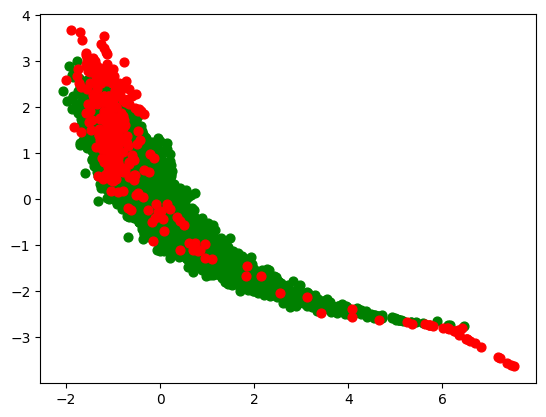

In [92]:
plt.scatter(x[y == 0].iloc[:,0],
            x[y == 0].iloc[:,1],
            s=40, c='green', marker='o', label='setosa')
# plot data points dari non sentosa
plt.scatter(x[y == 1].iloc[:,0],
            x[y == 1].iloc[:,1],

            s=40, c='red', marker='o', label='non-setosa')

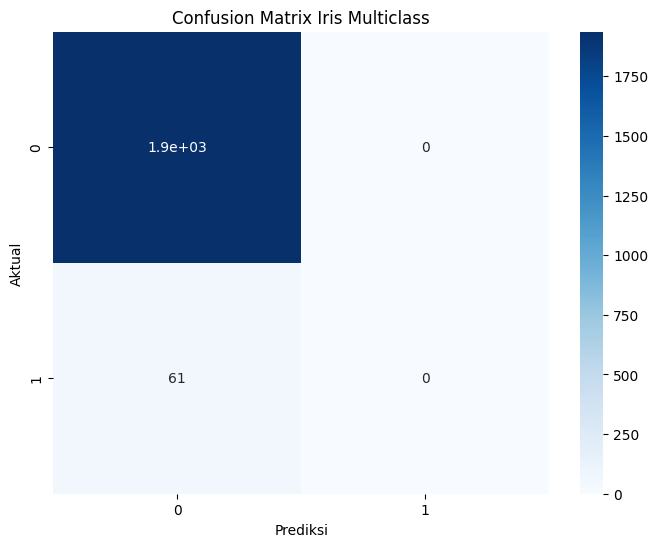

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Iris Multiclass')
plt.show()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,0.068587,0.281673,0.0
2,0.1,0.5,-0.227095,0.943784,5.0
3,0.2,0.6,-0.589725,-0.049382,7.0
9,298.5,309.0,1.128581,-1.203061,21.0
15,298.6,309.2,0.018377,0.843464,42.0
...,...,...,...,...,...
10003,298.8,308.4,0.364270,-1.052581,14.0
10004,298.9,308.4,0.520479,-0.821846,17.0
10005,299.0,308.6,0.593005,-0.661334,22.0
10006,299.0,308.7,-0.729198,0.853496,25.0


In [102]:
df1 = pd.read_csv('machine failure.csv')

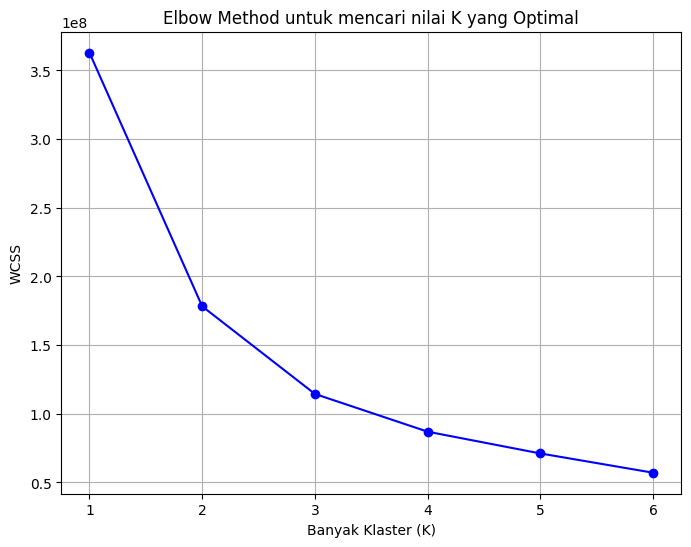

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = df1.dropna()
df1.drop_duplicates() # Gunakan dataset Iris dari Seaborn
X = df1.iloc[:,3:-6].values # Ambil data-data fiturnya untuk variabel X
wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok
# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)

In [106]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=1)

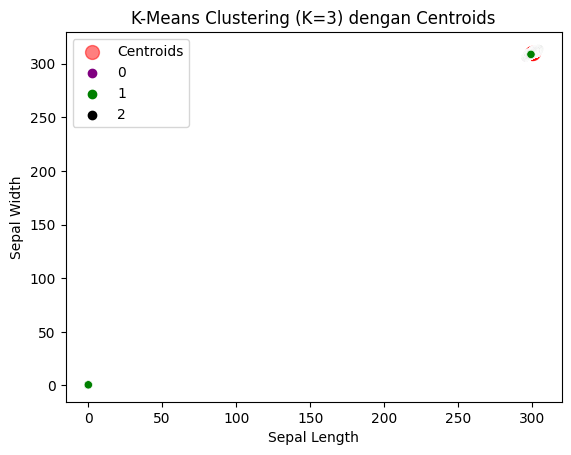

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

X = df1.iloc[:,3:-6].values # Gunakan fitur X
K = 3 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
df1["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df1, x='Air temperature [K]', y="Process temperature [K]",

hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()